In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Twitter_Data_updated.csv')

# Data Cleaning
data = data.dropna(subset=['clean_text','category'])
data=data.replace(0,1)
##data.fillna('', inplace=True)
print(data.head(30))


                                           clean_text  category
0   when modi promised “minimum government maximum...      -1.0
1   talk all the nonsense and continue all the dra...       1.0
2   what did just say vote for modi  welcome bjp t...       1.0
3   asking his supporters prefix chowkidar their n...       1.0
4   answer who among these the most powerful world...       1.0
5            kiya tho refresh maarkefir comment karo        1.0
6   surat women perform yagna seeks divine grace f...       1.0
7   this comes from cabinet which has scholars lik...       1.0
8   with upcoming election india saga going import...       1.0
9                          gandhi was gay does modi         1.0
10  things like demonetisation gst goods and servi...       1.0
11  hope tuthukudi people would prefer honest well...       1.0
12                  calm waters wheres the modi wave        1.0
13  one vote can make all the difference anil kapo...       1.0
14  one vote can make all the difference

In [ ]:
# Split the data into training and testing sets (e.g., 80% for training, 20% for testing)
X = data['clean_text']
y = data['category']  # Replace 'Target_column' with the actual target column name
t=random.randint(1,100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print('\n testing \n')
print(X_test)

63425     some media guys cant even think straight forwa...
78455                                             only namo
70129     does this add the space debris problem the awa...
157073    today’ interaction modi phenomenal looking fre...
120885    more modi bjp wants change nitin gadkari will ...
                                ...                        
119880    will buy mallyas kingfisher nirav modi choksi ...
103695                                    all the way modi 
131934    indians are getting cosy the idea voting rahul...
146869    wow reading comments here like watching circus...
121959    you are wrong love modi wont mind hearing his ...
Name: clean_text, Length: 130375, dtype: object

 testing 

42229     news flash modi address the nation cancels tri...
22035     according congress ecosystem bjp divided house...
79982     friends did not have the guts let drdo test mo...
118493    did modi violate the model code conduct speaki...
12815     raoul gandhy asked modi about 

In [ ]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [ ]:
y_pred = naive_bayes_classifier.predict(X_test_vectorized)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8617230165061054
              precision    recall  f1-score   support

        -1.0       0.81      0.49      0.61      7152
         1.0       0.87      0.97      0.92     25442

    accuracy                           0.86     32594
   macro avg       0.84      0.73      0.76     32594
weighted avg       0.86      0.86      0.85     32594



In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[ 3485  3667]
 [  840 24602]]


In [ ]:
import numpy
confusion_mat_values=confusion_mat.flatten()
print(confusion_mat_values)

[ 3485  3667   840 24602]


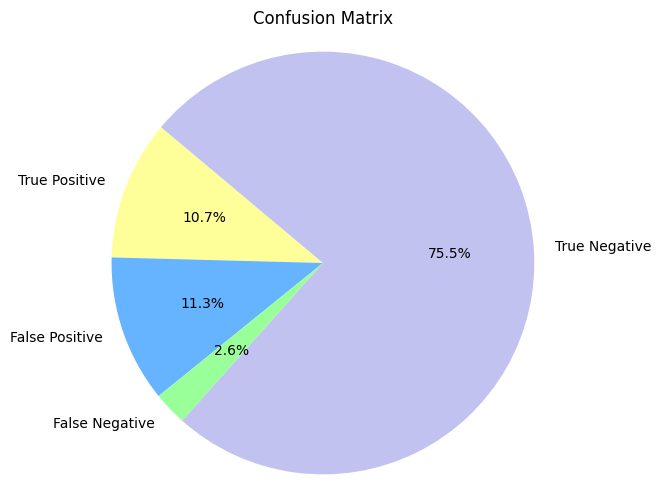

In [ ]:
labels = ['True Positive', 'False Positive', 'False Negative', 'True Negative']

# Define colors for the categories (3 different colors)
colors = ['#ffff99', '#66b3ff', '#99ff99', '#c2c2f0']
#confusion_mat_values=[3485,3667,840,24602]
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(confusion_mat_values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Confusion Matrix')

# Display the pie chart
plt.show()